# Problem Understanding
The objective of this project is to develop machine learning models to predict whether a patient has heart disease or not based on given features. By leveraging historical patient data, we aim to build predictive models that can assist healthcare professionals in identifying high-risk patients. This is a binary classification problem where the target variable can be encoded into two values: 1 indicates that the individual has heart disease, and 0 indicates that the individual does not have heart disease. 

# Data Understanding
To gain insights into the dataset, we perform exploratory data analysis (EDA) and visualize the data using matplotlib and seaborn. This helps in identifying patterns, relationships, and potential issues within the dataset. 

## 1. Import libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE

## 2. Load dataset 


In [2]:
data = pd.read_csv('Data set 1 (12 KB) - heart_disease.csv')
data.head(5) # Display the first 5 rows of the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Categorical data: 
1. sex - The gender of the patient (1 = male; 0 = female).
2. cp (chest pain type) - The type of chest pain experienced by the patient: 
    0: Typical angina 1: Atypical angina 2: Non-anginal pain 3: Asymptomatic
3. fbs (fasting blood sugar) - Whether the patient's fasting blood sugar is greater than 120 mg/dl (1 = true; 0 = false).
4. restecg (resting electrocardiographic results) - The results of the patient's resting electrocardiogram (ECG): 
    0: Normal 1: Having ST-T wave abnormality 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
5. exang(exercise-induced angina) - Whether the patient experiences angina (chest pain) induced by exercise (1 = yes; 0 = no).
6. slope (slope of the peak exercise ST segment) - The slope of the peak exercise ST segment: 
    0: Upsloping 1: Flat 2: Downsloping
7. ca (number of major vessels colored by fluoroscopy): The number of major vessels (0-4) colored by fluoroscopy
8. thal (Thalassemia) - A blood disorder. 1: Normal 2: Fixed defect 3: Reversible defect
9. target - 0: No heart disease 1: Heart disease

### Numerical data:
10. age - The age of the patient in years.
11. trestbps (resting blood pressure) - The patient's resting blood pressure (in mm Hg) at the time of hospital admission.
12. chol (serum cholesterol) - The patient's serum cholesterol level (in mg/dl).
13. thalach (maximum heart rate achieved) - The maximum heart rate achieved by the patient during a stress test.
14. oldpeak - ST depression induced by exercise relative to rest. It indicates the relative change in the ST segment during stress testing.

## 3. Explore dataset 

In [3]:
# shows how many features (columns) and observations (rows) there are in the dataset. 
data.shape # (rows, columns)

(303, 14)

In [4]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Display summary statistics of the dataset
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# calculates the relationship between each column in the data frame. 
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [7]:
print(data.corr()["target"].abs().sort_values(ascending=False))
# This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


### Analysing the target variable:
 

In [8]:
data.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

### Analysing the 'Sex' feature

In [9]:
data.groupby(['sex','target'])['target'].count()

sex  target
0    0          24
     1          72
1    0         114
     1          93
Name: target, dtype: int64

### Analysing the 'Chest Pain Type' feature

In [10]:
data.groupby(['cp','target'])['target'].count()

cp  target
0   0         104
    1          39
1   0           9
    1          41
2   0          18
    1          69
3   0           7
    1          16
Name: target, dtype: int64

### Analysing the 'fbs' feature

In [11]:
data.groupby(['fbs','target'])['target'].count()

fbs  target
0    0         116
     1         142
1    0          22
     1          23
Name: target, dtype: int64

### Analysing the 'restecg' feature

In [12]:
data.groupby(['restecg','target'])['target'].count()

restecg  target
0        0         79
         1         68
1        0         56
         1         96
2        0          3
         1          1
Name: target, dtype: int64

### Analysing the 'exang' feature

In [13]:
data.groupby(['exang','target'])['target'].count()

exang  target
0      0          62
       1         142
1      0          76
       1          23
Name: target, dtype: int64

### Analysing the 'Slope' feature

In [14]:
data.groupby(['slope','target'])['target'].count()

slope  target
0      0          12
       1           9
1      0          91
       1          49
2      0          35
       1         107
Name: target, dtype: int64

### Analysing the 'ca' feature

In [15]:
data.groupby(['ca','target'])['target'].count()

ca  target
0   0          45
    1         130
1   0          44
    1          21
2   0          31
    1           7
3   0          17
    1           3
4   0           1
    1           4
Name: target, dtype: int64

### Analysing the 'thal' feature

In [16]:
data.groupby(['thal','target'])['target'].count()

thal  target
0     0           1
      1           1
1     0          12
      1           6
2     0          36
      1         130
3     0          89
      1          28
Name: target, dtype: int64

## 4. Data Visualization

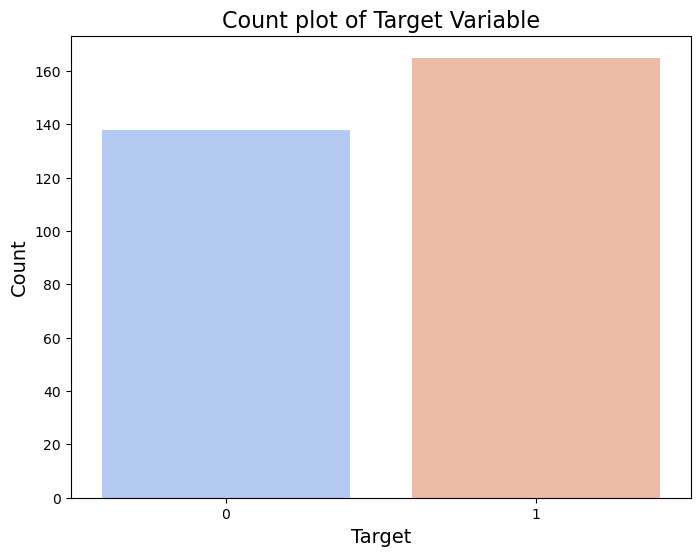

In [17]:
# Count plot of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=data, palette='coolwarm')
plt.title('Count plot of Target Variable', fontsize=16)
plt.xlabel('Target', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1])
plt.show()

Although the two classes are not exactly 50% each but the ratio is good enough to continue without dropping/increasing our data, it is considered as a balance dataset. 

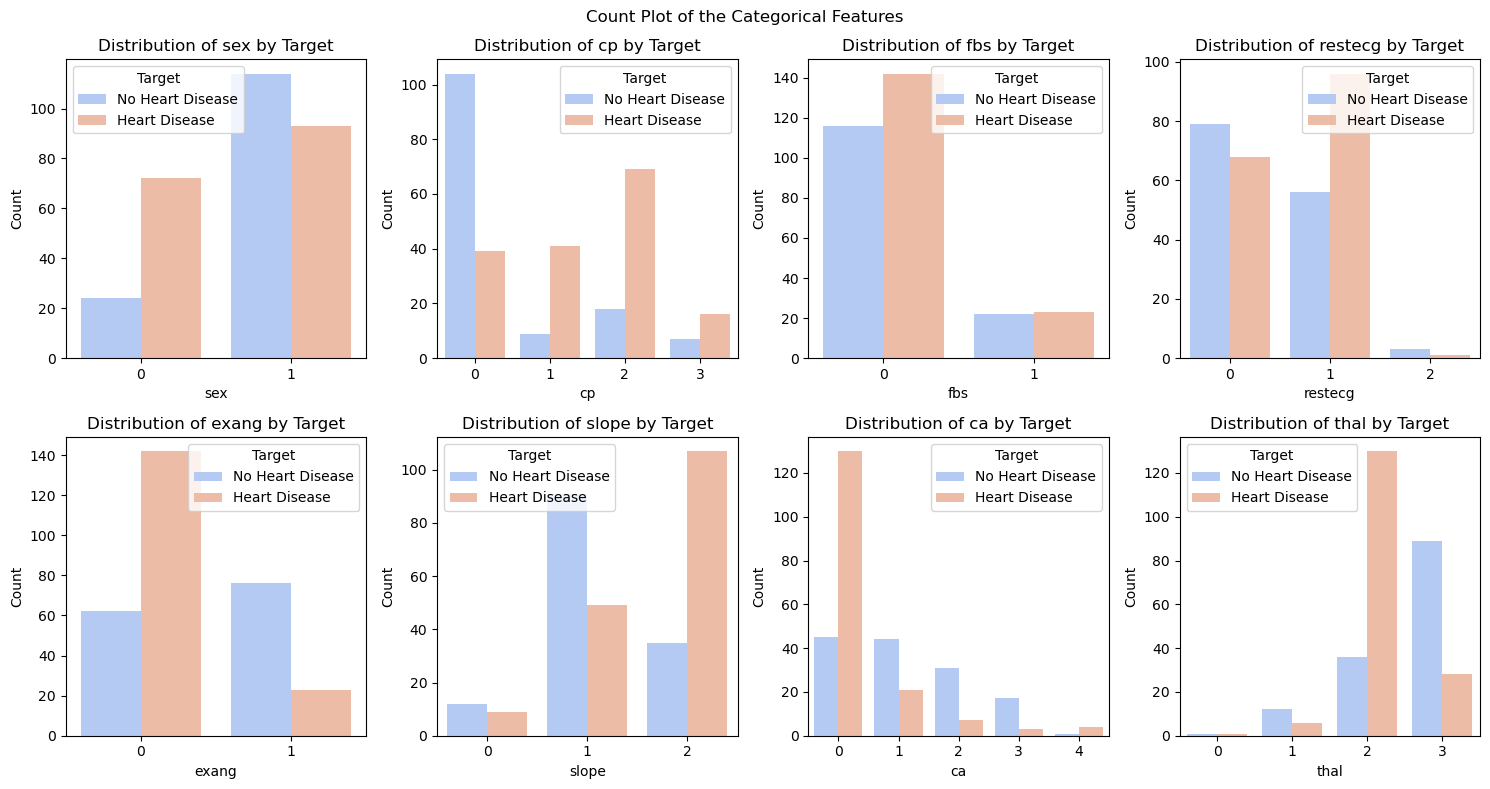

In [18]:
# Count Plot of the Categorical Features
plt.figure(figsize=(15, 8))
data['target'] = data['target'].astype(str)
df = data.sort_values(by='target')
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for i, feature in enumerate(categorical_features):
    plt.subplot(2, 4, i + 1)
    sns.countplot(x=feature, hue='target', data=df, palette='coolwarm')
    plt.title(f'Distribution of {feature} by Target')
    plt.suptitle("Count Plot of the Categorical Features")
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
    plt.tight_layout()
plt.show()

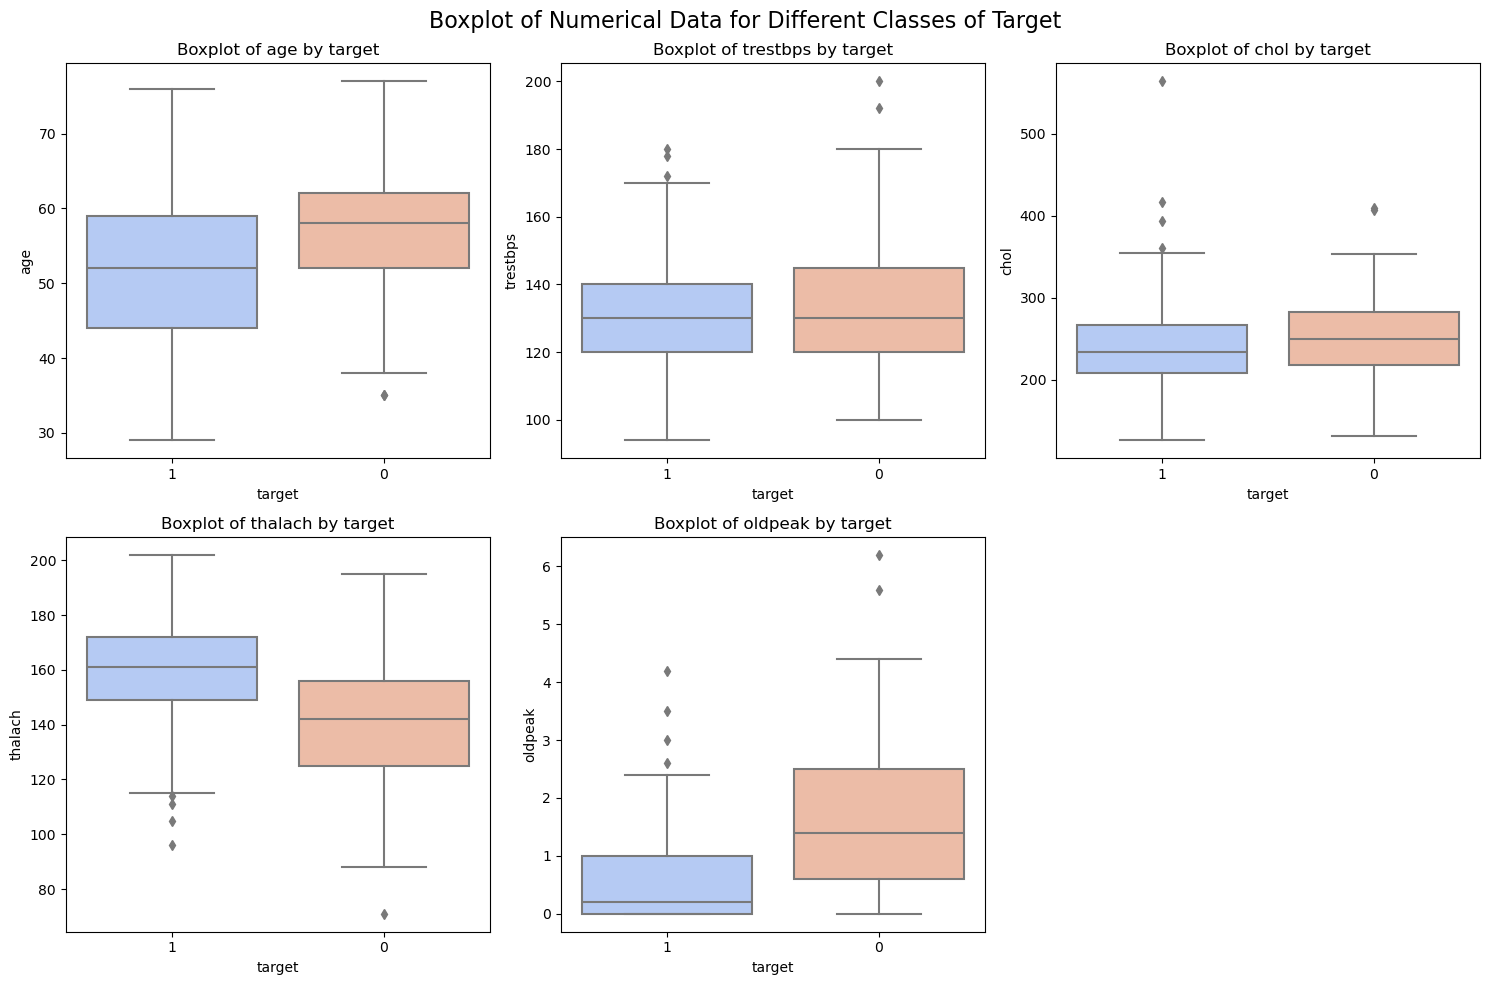

In [19]:
# Specify the numerical features and the target variable
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
target = 'target'  

# Plot boxplots for numerical features grouped by target variable
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)  # Adjust the subplot grid size as needed
    sns.boxplot(x=target, y=feature, data=data, palette='coolwarm')
    plt.title(f'Boxplot of {feature} by {target}')
    plt.xlabel(target)
    plt.ylabel(feature)

plt.suptitle('Boxplot of Numerical Data for Different Classes of Target', fontsize=16)
plt.tight_layout()
plt.show()

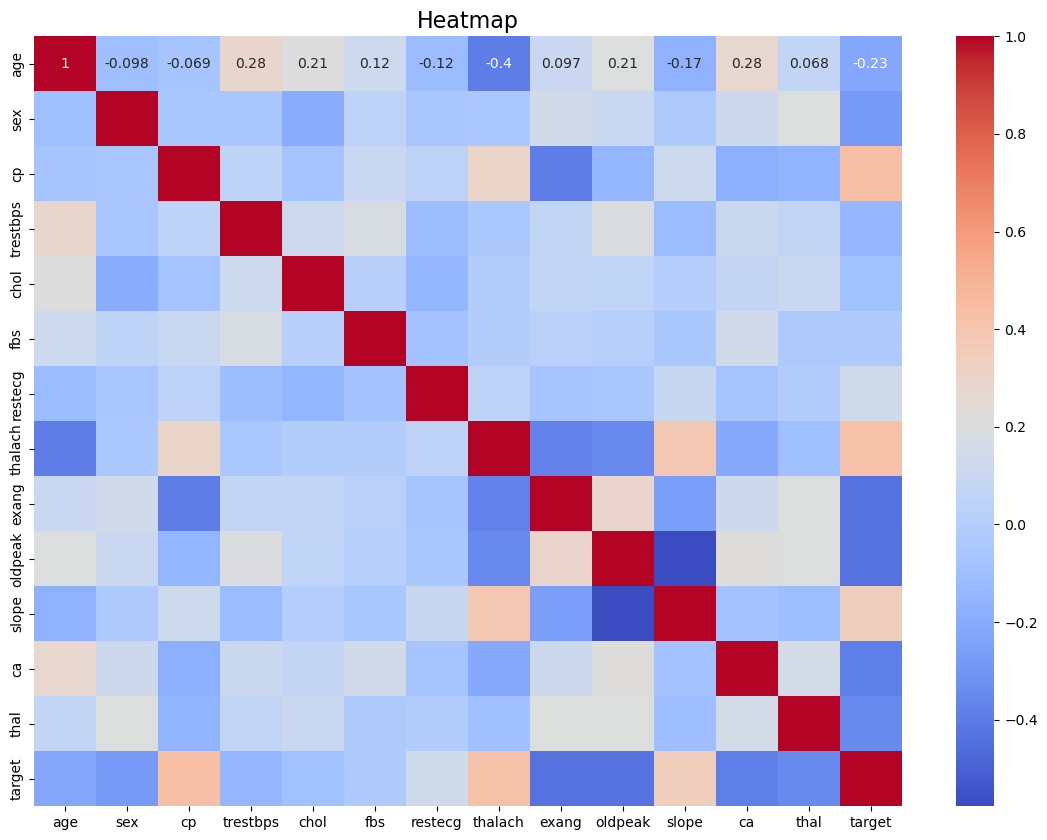

In [20]:
# Plotting the correlation matrix heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap', fontsize=16)
plt.show()

# Data Preparation
The data preparation process involves cleaning, transforming, and splitting the data into training and testing sets to ensure robust model evaluation. 

### 1. Data Cleaning: Handle missing values and remove duplicates.

In [21]:
# Check for missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [22]:
# Check for duplicated rows
data.duplicated().sum()

1

In [23]:
# Drop duplicated rows
data.drop_duplicates(inplace = True)

In [24]:
# Since we define that thal 1: Normal 2: Fixed defect 3: Reversible defect and 0 only have 2 people. 
# So we assume 0 is a null and drop it.
print(data.thal.value_counts())
data=data[data.thal != 0]

thal
2    165
3    117
1     18
0      2
Name: count, dtype: int64


### 2. Data Splitting: Split the data into training and testing sets. 

In [25]:
# Separate features and target variable
x = data.drop('target', axis=1)
y = data['target'].astype(int)

In [26]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
# test_size=0.2: Specifies that 20% of the data should be allocated to the testing set, and 80% to the training set.

### 3. Data Scaling: Standardize the features to bring them to a similar scale.

In [27]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [28]:
x_train.shape

(240, 13)

In [29]:
x_test.shape

(60, 13)

# Modelling
We will use three machine learning algorithms: K-Nearest Neighbors (KNN), Decision Tree, and Support Vector Machine (SVM). Each model will be trained on the training data and evaluated on the testing data. 

## 1. K-Nearest Neighbours (KNN)

In [30]:
f_range = range(1, 14)
k_range = range(1, 17)
best_score = 0
best_f = 0
best_n = 0
best_features = None
for f in f_range:
    selector = SelectKBest(score_func=f_classif, k=f)
    for n in k_range:
        # Create a k-NN classifier
        knn = KNeighborsClassifier(n_neighbors=n)

        # Create a pipeline
        pipeline = Pipeline([('feature_selection', selector), ('classification', knn)])

        # Train the model
        pipeline.fit(x_train_scaled, y_train)

        # Evaluate the model
        score = pipeline.score(x_test_scaled, y_test)
        # print(f'Accuracy: k={l}, n_neighbors={m}, score={score}')

        # Check if this is the best score
        if score > best_score:
            best_score = score
            best_f = f
            best_n = n
            best_features = selector.get_support(indices=True)
# Display the best accuracy and the selected features
print(f'Best Accuracy: {best_score}')
print(f'Best k (number of features): {best_f}')
print(f'Best number of neighbors: {best_n}')
print(f'Selected features: {x_train.columns[best_features]}')

Best Accuracy: 0.9
Best k (number of features): 13
Best number of neighbors: 11
Selected features: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


From the output above, we will get the best accuracy by selecting all features,.

In [31]:
#Try running from k=1 through 17 and record testing accuracy
k_range = range(1,17)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k) #default is 5
        knn.fit(x_train_scaled,y_train)
        y_pred=knn.predict(x_test_scaled)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))
scores

{1: 0.75,
 2: 0.7,
 3: 0.7666666666666667,
 4: 0.7833333333333333,
 5: 0.8666666666666667,
 6: 0.8333333333333334,
 7: 0.8666666666666667,
 8: 0.8666666666666667,
 9: 0.8833333333333333,
 10: 0.8833333333333333,
 11: 0.9,
 12: 0.8833333333333333,
 13: 0.8833333333333333,
 14: 0.85,
 15: 0.8333333333333334,
 16: 0.8333333333333334}

Text(0, 0.5, 'Testing Accuracy')

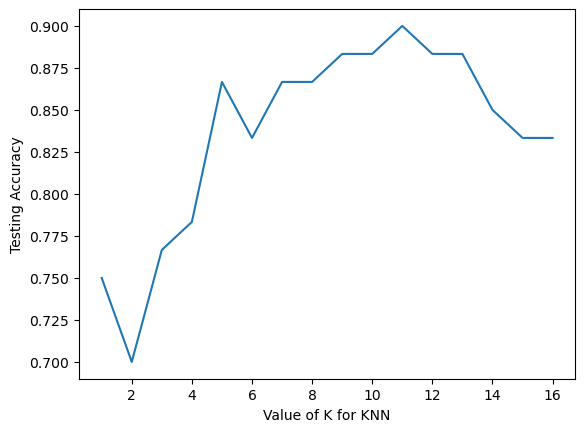

In [32]:
# Plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

k=11 is the best value of k for KNN

In [33]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=11)

# Train the KNN classifier
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=11)

In [34]:
# Make predictions on the test set
y_test_pred_knn = knn.predict(x_test_scaled)

# Calculate accuracy on test set
accuracy_test_knn = accuracy_score(y_test, y_test_pred_knn)
# Calculate other metrics on test set
precision_test_knn = precision_score(y_test, y_test_pred_knn)
recall_test_knn = recall_score(y_test, y_test_pred_knn)
f1_test_knn = f1_score(y_test, y_test_pred_knn)

print("K-Nearest Neighbours:")
print("Test Set Accuracy: ", accuracy_test_knn)
print("Precision: ", precision_test_knn)
print("Recall: ", recall_test_knn)
print("F1 Score: ", f1_test_knn)

confusion = confusion_matrix(y_test, y_test_pred_knn)
print('Confusion matrix:')
print(confusion)

K-Nearest Neighbours:
Test Set Accuracy:  0.9
Precision:  0.9032258064516129
Recall:  0.9032258064516129
F1 Score:  0.9032258064516129
Confusion matrix:
[[26  3]
 [ 3 28]]


In [35]:
# Make predictions on the train set
y_train_pred_knn = knn.predict(x_train_scaled)

# Calculate accuracy on train set
accuracy_train_knn = accuracy_score(y_train, y_train_pred_knn)

print("Training Set Accuracy: ", accuracy_train_knn)
print("Test Set Accuracy: ", accuracy_test_knn)
print("Difference in Accuracy: ", abs(accuracy_train_knn - accuracy_test_knn))

Training Set Accuracy:  0.85
Test Set Accuracy:  0.9
Difference in Accuracy:  0.050000000000000044


## 2. Decision Tree

In [36]:
# Train a Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(x_train_scaled, y_train)
y_pred = dt.predict(x_test_scaled)

In [37]:
# Get feature importances
importances = dt.feature_importances_

# Select features with importance greater than a threshold
# This threshold determines which features are considered sufficiently important to keep.
threshold = 0.1 
selected_features = x.columns[importances > threshold]

# Use only the selected features
x_train_selected = x_train[selected_features]
x_test_selected = x_test[selected_features]
print(selected_features)

Index(['cp', 'oldpeak', 'ca', 'thal'], dtype='object')


In [38]:
# Train a new model using the selected features
dt_selected = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_selected.fit(x_train_selected, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [39]:
# Make predictions on the test set using the model trained with all features
y_pred_all_features = dt.predict(x_test_scaled)

# Calculate the accuracy of the model with all features
accuracy_all_features = accuracy_score(y_test, y_pred_all_features)
print(f"Accuracy with all features: {accuracy_all_features}")

# Make predictions on the test set using the model trained with selected features
y_pred_selected_features = dt_selected.predict(x_test_selected)

# Calculate the accuracy of the model with selected features
accuracy_selected_features = accuracy_score(y_test, y_pred_selected_features)
print(f"Accuracy with selected features: {accuracy_selected_features}")

Accuracy with all features: 0.7666666666666667
Accuracy with selected features: 0.85


In [40]:
# Make predictions on the test set using the model trained with selected features
y_test_pred_dt = dt_selected.predict(x_test_selected)

# Calculate the accuracy of the model with selected features
accuracy_test_dt = accuracy_score(y_test, y_test_pred_dt)
# Calculate other metrics on test set
precision_test_dt = precision_score(y_test, y_test_pred_dt)
recall_test_dt = recall_score(y_test, y_test_pred_dt)
f1_test_dt = f1_score(y_test, y_test_pred_dt)

print("Decision Tree: ")
print("Test Set Accuracy: ", accuracy_test_dt)
print("Precision: ", precision_test_dt)
print("Recall: ", recall_test_dt)
print("F1 Score: ", f1_test_dt)

confusion_dt = confusion_matrix(y_test, y_test_pred_dt)
print('Confusion matrix:')
print(confusion_dt)

Decision Tree: 
Test Set Accuracy:  0.85
Precision:  0.84375
Recall:  0.8709677419354839
F1 Score:  0.8571428571428571
Confusion matrix:
[[24  5]
 [ 4 27]]


In [41]:
# Make predictions on the train set
y_train_pred_dt = dt_selected.predict(x_train_selected)

# Calculate accuracy on train set
accuracy_train_dt = accuracy_score(y_train, y_train_pred_dt)
print("Training Set Accuracy: ", accuracy_train_dt)
print("Test Set Accuracy: ", accuracy_test_dt)
print("Difference in Accuracy: ", abs(accuracy_train_dt - accuracy_test_dt))

Training Set Accuracy:  0.8916666666666667
Test Set Accuracy:  0.85
Difference in Accuracy:  0.04166666666666674


## 3. Support Vector Machine (SVM)

In [42]:
svm = SVC(kernel='linear', random_state=42)

# Initialize RFE selector
selector = RFE(svm, n_features_to_select=7, step=1)

# Fit RFE
selector = selector.fit(x_train_scaled, y_train)

# Selected features
selected_features = selector.support_
print("Selected features:", x_train.columns[selected_features])


Selected features: Index(['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal'], dtype='object')


In [43]:
# Transform training and testing data to selected features
x_train_selected = selector.transform(x_train_scaled)
x_test_selected = selector.transform(x_test_scaled)

# Train SVM on selected features
svm.fit(x_train_selected, y_train)

SVC(kernel='linear', random_state=42)

In [44]:
# Predict on test data
y_test_pred_svm = svm.predict(x_test_selected)

# Calculate accuracy
accuracy_test_svm = accuracy_score(y_test, y_test_pred_svm)

# Calculate other metrics on test set
precision_test_svm = precision_score(y_test, y_test_pred_svm)
recall_test_svm = recall_score(y_test, y_test_pred_svm)
f1_test_svm = f1_score(y_test, y_test_pred_svm)

print("Support Vector Machine (linear): ")
print("Test Set Accuracy: ", accuracy_test_svm)
print("Precision: ", precision_test_svm)
print("Recall: ", recall_test_svm)
print("F1 Score: ", f1_test_svm)

confusion_svm = confusion_matrix(y_test, y_test_pred_svm)
print('Confusion matrix:')
print(confusion_svm)

Support Vector Machine (linear): 
Test Set Accuracy:  0.85
Precision:  0.84375
Recall:  0.8709677419354839
F1 Score:  0.8571428571428571
Confusion matrix:
[[24  5]
 [ 4 27]]


In [45]:
# Make predictions on the train set
y_train_pred_svm = svm.predict(x_train_selected)
# Calculate accuracy on train set
accuracy_train_svm = accuracy_score(y_train, y_train_pred_svm)
print("Training Set Accuracy: ", accuracy_train_svm)
print("Test Set Accuracy: ", accuracy_test_svm)
print("Difference in Accuracy: ", abs(accuracy_train_svm - accuracy_test_svm))

Training Set Accuracy:  0.8458333333333333
Test Set Accuracy:  0.85
Difference in Accuracy:  0.004166666666666652


# Comparison

In [46]:
print("Accuracy: ")
print("KNN:", accuracy_test_knn)
print("Decision Tree:", accuracy_test_dt)
print("SVM:", accuracy_test_svm)

Accuracy: 
KNN: 0.9
Decision Tree: 0.85
SVM: 0.85


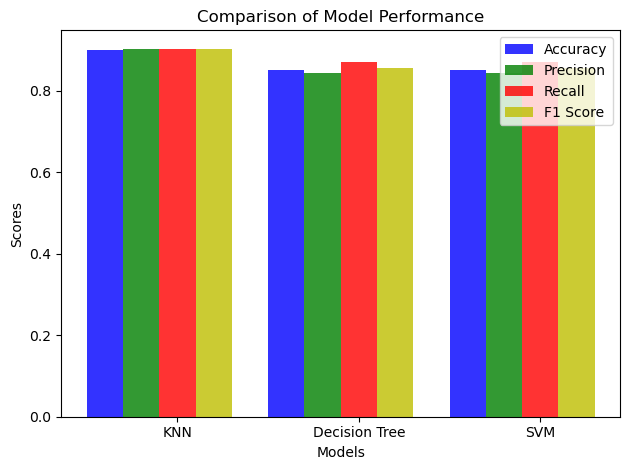

In [47]:
# Collect all the scores
models = ['KNN', 'Decision Tree', 'SVM']
accuracies = [accuracy_test_knn, accuracy_test_dt, accuracy_test_svm]
precisions = [precision_test_knn, precision_test_dt, precision_test_svm]
recalls = [recall_test_knn, recall_test_dt, recall_test_svm]
f1_scores = [f1_test_knn, f1_test_dt, f1_test_svm]

# Plot the scores
x = np.arange(len(models))

fig, ax = plt.subplots()
bar_width = 0.2
opacity = 0.8

rects1 = plt.bar(x - bar_width, accuracies, bar_width, alpha=opacity, color='b', label='Accuracy')
rects2 = plt.bar(x, precisions, bar_width, alpha=opacity, color='g', label='Precision')
rects3 = plt.bar(x + bar_width, recalls, bar_width, alpha=opacity, color='r', label='Recall')
rects4 = plt.bar(x + 2*bar_width, f1_scores, bar_width, alpha=opacity, color='y', label='F1 Score')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Model Performance')
plt.xticks(x + bar_width, models)
plt.legend()

plt.tight_layout()
plt.show()

## K-Nearest Neighbours (KNN) is the champion model because it has a higher accuracy compared to Decision Tree and SVM.

# Display the prediction of KNN in table form

In [48]:
x_test=x_test.assign(target = y_test)
x_test=x_test.assign(prediction = y_test_pred_knn)
x_test = x_test.sort_values(['target', 'prediction'], ascending=[True, True])
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,prediction
205,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,0
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0,0
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3,0,0
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0,0
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0,0
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0,0
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0,0
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0,0


### We can see that there are 6 rows have wrong predictions out of 60 rows.

## Making prediction on some unseen data 

In [49]:
classes = {0:'No heart disease',1:'Have heart disease'}

#Making prediction on some unseen data 
#predict for the below two random observations
x_new = [[66,0,2,146,278,0,0,152,0,0.0,1,1,2],
         [52,1,0,128,255,0,1,161,1,0.0,2,1,3]]
x_new_scaled=scaler.fit_transform(x_new)
y_predict = knn.predict(x_new_scaled)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

Have heart disease
No heart disease
